In [ ]:
# Tensorflow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Otras librerías utiles
from sklearn.model_selection import train_test_split # para separar los datos
import pandas as pd #Carga de datos
import numpy as np # Manipulacion de datos
import matplotlib.pyplot as plt # Graficar

# Problema de Clasificación

In [ ]:
nombre='Conjunto1.csv'
datos=pd.read_csv(nombre)
datos.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
X=datos.drop('Class',axis='columns')
y=datos['Class']

In [ ]:
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
y=pd.get_dummies(y)
y.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

print('Dimensiones de los datos de Entrenamiento: ' + str(X_train.shape) + ' ' +  str(y_train.shape))
print('Dimensiones de los datos de Prueba: ' + str(X_test.shape) + ' ' +  str(y_test.shape))

Dimensiones de los datos de Entrenamiento: (1234, 4) (1234, 2)
Dimensiones de los datos de Prueba: (138, 4) (138, 2)


Los siguientes son hipervínculos a las secciones de Keras. 

[Capas densas](https://keras.io/api/layers/core_layers/dense/)

[Funciones de activación](https://keras.io/api/layers/activations/)

[Métricas](https://keras.io/api/metrics/)

[Funciones de pérdida](https://keras.io/api/losses/)

[Optimizador](https://keras.io/api/optimizers/)

In [ ]:
# Arquitectura
# No es necesario definir una capa de entrada con el tamaño de input, esta
# se setea automáticamente en los modelos secuenciales de keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(4, activation='tanh'),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
# Debemos compilar el modelo, aqui agregamos
# Optimizador + Función de Pérdida + Métricas a evaluar en el entrenamiento
model.compile(optimizer='Adam',                                                    # <--- optimizador
              loss='binary_crossentropy',                                  # <--- pérdidad/error
              metrics=['accuracy'])                                                  # <--- métricas

In [ ]:
# Entrenamiento del modelo, aquí se ingresan
# Conjunto de entrenamiento (X_train, y_train),  
# número de épocas (epochs) 
# conjunto de validación (X_val, y_val) o en su defecto, un porcentaje del conjunto 
# de entrenamiento a considerar como validación (validation_split)
history = model.fit(X_train, y_train, epochs=30, validation_split = 0.111)  

Epoch 1/30
35/35 [==============================] - 1s 11ms/step - loss: 0.7273 - accuracy: 0.4786 - val_loss: 0.6642 - val_accuracy: 0.7007
Epoch 2/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6910 - val_loss: 0.6114 - val_accuracy: 0.7664
Epoch 3/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7338 - val_loss: 0.5677 - val_accuracy: 0.8102
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7767 - val_loss: 0.5171 - val_accuracy: 0.8613
Epoch 5/30
35/35 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.8396 - val_loss: 0.4557 - val_accuracy: 0.9051
Epoch 6/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8906 - val_loss: 0.4002 - val_accuracy: 0.9197
Epoch 7/30
35/35 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.9262 - val_loss: 0.3438 - val_accuracy: 0.9416
Epoch 8/30
35/35 [=

In [ ]:
# La información del entrenamiento la guardamos en la variable history, la cual
# contiene el modelo (history.model) y la historia del entrenamiento (history.history)
type(history.history)

dict

In [ ]:
history.history

In [ ]:
# El modelo
history.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


## Visualizar el entrenamiento
Al final de cada época, los valores de la función de pérdida y la(s) métrica(s) escogida(s) son almacenadas en la historia del entrenamiento, estas pueden ser analizadas gráficamente. 

### Métricas

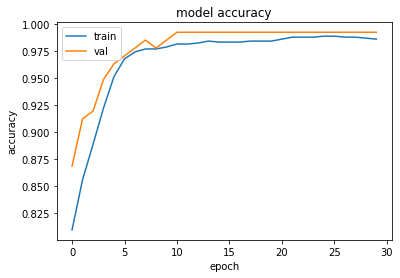

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Función de pérdida

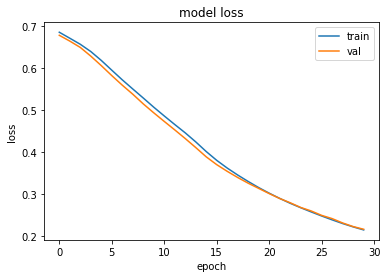

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Accuracy + Loss

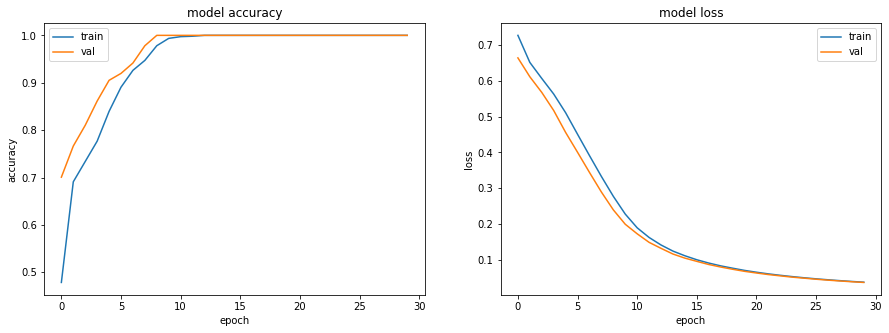

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.axvline(x=1.5, ymin=0, ymax=1, c="r")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axvline(x=1.5, ymin=0, ymax=1, c="r")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')


plt.show()

# Testing
Esta etapa la ejecutaremos usando el mejor modelo que hayamos guardado. Es importante 

### Cargamos el mejor modelo: 

In [ ]:
predicciones = model.predict(X_test)
predicciones.shape

(138, 2)

In [ ]:
# La salida del modelo para un input
predicciones[0]

array([2.0381682e-05, 9.9997962e-01], dtype=float32)

In [ ]:
#etiquetas = [Verdadero , Falso] mismo orden
# En un problema de clasificación multi-clase me quedo con aquella categoría de la componente con el valor más alto
clase = predicciones[0].argmax()
print(f"Clase predicha: {clase}")

Clase predicha: 1


In [ ]:
datos[17:18]

,Variance,Skewness,Curtosis,Entropy,Class
17,0.80355,2.8473,4.3439,0.6017,0


In [ ]:
Prueba=datos[17:18].drop('Class',axis=1)
Prueba 

,Variance,Skewness,Curtosis,Entropy
17,0.80355,2.8473,4.3439,0.6017


In [ ]:
prediccion = model.predict(Prueba)
prediccion 

array([[0.8762724 , 0.12372763]], dtype=float32)

In [ ]:
prediccion[0].argmax()

0

## Evaluación de métricas
En problemas de clasificación es usual considerar la matriz de confusión, pues esta nos permite extraer varias métricas para cada etiqueta

**Matriz de confusión** 


Pred \ GT         | Negative Class | Positive Class
------------------|----------------|--------------
 Negative Class   |        TN      |       FN
 Positive Class   |        FP      |       TP
 
- **TN**: True Negative. Se refiere a aquellos datos que fueron correctamente clasificados por el modelo en la clase negativa (Ej: no es la clase 1). 
- **TP**: True Positive. Se refiere a aquellos datos que fueron correctamente clasificados por el modelo en la clase positiva (Ej: es la clase 1)  
- **FP**: False Positive. Se refiere a aquellos datos que fueron erróneamente clasificados por el modelo en la clase positiva (Ej: un dato cuya etiqueta real/ground truth era 1, pero cuya predicción fue 0)
- **FN**: False Negative. Se refiere a aquellos datos que fueron erróneamente clasificados por el modelo en la clase negativa (Ej: un dato cuya etiqueta real/ground truth era 1, pero cuya predicción fue 0)

Note que todas las definiciones anteriores toman como punto de referencia al modelo. Lo importante es saber qué ocurre con las predicciones. 

- **Accuracy**
$\dfrac{(TP + TN)}{(TP + TN + FP + FN)}$

- **Sensitivity/Recall**
$\dfrac{TP}{(TP + FN)}$

- **Specificity SP**
$\dfrac{TN}{(TN + FP)}$

- **Precision**
$\dfrac{TP}{(TP + FP)}$

- **Negative Rate**
$\dfrac{TN}{(TN + FN)}$

Todo esto está pensado en un problema binario. Esto se puede extender a un problema multi-clase, haciendo este análisis para cada variable por separado.


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Ground truth
y_true = y_test.values.argmax(axis=1)

# Prediccion decodificada: extraemos la etiqueta para cada input (argmax a lo largo de las columnas -> axis=1)
y_pred = predicciones.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

In [ ]:
cm

array([[66,  1],
       [ 1, 70]])

In [ ]:
# Accuracy del modelo en el testing
acc = sum(cm.diagonal()) / cm.sum().sum()
print(f"Accuray Testing = {acc}")

Accuray Testing = 0.9855072463768116


# Problema de Regresión

In [ ]:
nombre='Conjunto2.csv'
datos=pd.read_csv(nombre)
datos.head() 

,sbp;tobacco;ldl;adiposity;famhist;typea;obesity;alcohol;age;chd
0,160;12.00; 5.73;23.11;Present;49;25.30; 97.20;...
1,144; 0.01; 4.41;28.61;Absent;55;28.87; 2.06;6...
2,118; 0.08; 3.48;32.28;Present;52;29.14; 3.81;...
3,170; 7.50; 6.41;38.03;Present;51;31.99; 24.26;...
4,134;13.60; 3.50;27.78;Present;60;25.99; 57.34;...


In [ ]:
datos=pd.read_csv(nombre, sep=';')
datos.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [ ]:
X=datos.drop('obesity',axis='columns')
y=datos['obesity']

In [ ]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,57.34,49,Si


In [ ]:
X=pd.get_dummies(X)
X.head()

,sbp,tobacco,ldl,adiposity,typea,alcohol,age,famhist_Absent,famhist_Present,chd_No,chd_Si
0,160,12.00,5.73,23.11,49,97.20,52,0,1,0,1
1,144,0.01,4.41,28.61,55,2.06,63,1,0,0,1
2,118,0.08,3.48,32.28,52,3.81,46,0,1,1,0
3,170,7.50,6.41,38.03,51,24.26,58,0,1,0,1
4,134,13.60,3.50,27.78,60,57.34,49,0,1,0,1


In [ ]:
y.head()

0    25.30
1    28.87
2    29.14
3    31.99
4    25.99
Name: obesity, dtype: float64

In [ ]:
y=(y-y.min())/(y.max()-y.min())
y.head()

0    0.332497
1    0.444479
2    0.452949
3    0.542346
4    0.354141
Name: obesity, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

print('Dimensiones de los datos de Entrenamiento: ' + str(X_train.shape) + ' ' +  str(y_train.shape))
print('Dimensiones de los datos de Prueba: ' + str(X_test.shape) + ' ' +  str(y_test.shape))

Dimensiones de los datos de Entrenamiento: (415, 11) (415,)
Dimensiones de los datos de Prueba: (47, 11) (47,)


In [ ]:
# Arquitectura
# No es necesario definir una capa de entrada con el tamaño de input, esta
# se setea automáticamente en los modelos secuenciales de keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(14, activation='tanh'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])
# Debemos compilar el modelo, aqui agregamos
# Optimizador + Función de Pérdida + Métricas a evaluar en el entrenamiento
model.compile(optimizer='Adam',                                                    # <--- optimizador
              loss='mse',                                  # <--- pérdidad/error
              metrics=['mse','mae'])  
# Entrenamiento del modelo, aquí se ingresan
# Conjunto de entrenamiento (X_train, y_train),  
# número de épocas (epochs) 
# conjunto de validación (X_val, y_val) o en su defecto, un porcentaje del conjunto 
# de entrenamiento a considerar como validación (validation_split)
history = model.fit(X_train, y_train, epochs=30, validation_split = 0.111)      

Epoch 1/30
12/12 [==============================] - 1s 17ms/step - loss: 0.7241 - mse: 0.7241 - mae: 0.7872 - val_loss: 0.0463 - val_mse: 0.0463 - val_mae: 0.1613
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0259 - mse: 0.0259 - mae: 0.1188 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1435
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0268 - mse: 0.0268 - mae: 0.1244 - val_loss: 0.0349 - val_mse: 0.0349 - val_mae: 0.1521
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1141 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.1254
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0179 - mse: 0.0179 - mae: 0.1017 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1139
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0180 - mae: 0.1037 - val_loss: 0.0221 - val_mse: 0.0221 - val_mae: 0.1137
Epoch 7/30
12/12 [=========

In [ ]:
# El modelo
history.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


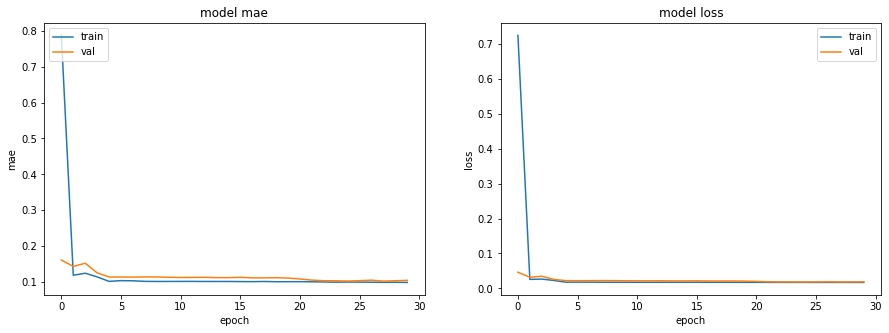

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
#plt.axvline(x=1.5, ymin=0, ymax=1, c="r")
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axvline(x=1.5, ymin=0, ymax=1, c="r")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')


plt.show()

In [ ]:
predicciones = model.predict(X_test)
predicciones.shape

(47, 1)

In [ ]:
# La salida del modelo para un input
predicciones[0:5]

array([[0.3505894 ],
       [0.35057676],
       [0.35057676],
       [0.35057676],
       [0.35057676]], dtype=float32)

In [ ]:
y_test.values[0:5]

array([0.34410289, 0.24309912, 0.42973651, 0.29422836, 0.29579674])

In [ ]:
from sklearn.metrics import mean_squared_error as mse 
error_cuadratico_medio=mse(predicciones, y_test.values)
print(error_cuadratico_medio) 

0.020211283439293556
